<a href="https://colab.research.google.com/github/BAYEGASPARD/Using-Machine-learning-in-API-traffic-analysis-for-anomality-detection/blob/master/Using_machine_learning_for_anomally_detection_in_API_traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install faker

     |████████████████████████████████| 972kB 9.5MB/s 


In [288]:
import pandas
import csv
from faker import Faker
import datetime
from matplotlib import pyplot
from random import getrandbits
from ipaddress import IPv4Network, IPv4Address
from collections import Counter


version0 = 20
ip_list = []
#ip_list2 = []
ip_addr = [] 
occr   = []
n = []


def datagenerate(records, headers):
    fake = Faker('en_US')
    fake1 = Faker('en_GB')   # To generate phone numbers
    with open("Synth_data.csv", 'wt') as csvFile:
        writer = csv.DictWriter(csvFile, fieldnames=headers)
        writer.writeheader()
        for i in range(records):
          index = "pingf-sys-log-"+fake.date(pattern="%d-%m-%Y", end_datetime=datetime.date(2019, 12,1))
          type1 = "pingf-sys-log"+str(fake.random_int())
          beatname = fake.name() + str(fake.random_int())
          BeatHostname = beatname
          BeatVersion = str(fake.random_int())+"."+str(fake.random_int())+"."+str(fake.random_int())
          Env = "qa"
          
          Project = "pingf"
          HttpVersion = 1.1
          logType = fake.random.choice(['request','response']),
          ResponseCode = fake.random.choice(['200','300','400','500']),
          Message = fake.ipv4_private()+"--"+"["+fake.date()+fake.time()+"]"+"\""+fake.random.choice(['GET','POST','OPTIONS', 'PUT','DELETE'])+"/"+"https://rbc.com"+fake.file_path()+"HTTP/1.1"+fake.random.choice(['200','300','400','500'])+fake.url()+"\""+fake.user_agent()
          Offset = str(fake.random_int())+"."+str(fake.random_int())
          Source = fake.file_path()+fake.date()+fake.random.choice(['request','response'])+str(fake.random_int())+".log"
          Tags = "pingf, qa, ping-federate, gcc, beats input codec plain applied"
          uri1 = "https://rbc.com"+fake.file_path()
       
          global version0 
          version0 +=1
          # generate random ip from a  subnet
          global ip_list, addr_str, n
          subnet = IPv4Network("192.168.0.0/24")
          bits = getrandbits(subnet.max_prefixlen - subnet.prefixlen) 
          addr = IPv4Address(subnet.network_address + bits)
          addr_str = str(addr)
          ip_list.append(addr_str)
          #print(ip_list)
          global ip_addr , occr, l, ip_list2, occr2, addr_str2, Addr
          occr = Counter((ip_list)).values()
          ip_addr = Counter((ip_list)).keys()
          
          #print(ip_addr)
          n = fake.random_int(min=1, max = 1000, step=2)
          #print(occr)
            # Normalize data
          
          
                    


                    #subnet = IPv4Network("188.30.55.0/30")
                    #bits = getrandbits(subnet.max_prefixlen - subnet.prefixlen) 
                    #Addr = IPv4Address(subnet.network_address + bits)
                    #addr_str2 = str(Addr)
                    #ip_list2.append(addr_str2)
                    #occr2 = Counter((ip_list2)).values()
                    #thewriter.writerow(['Normal', i, IP])
                    #thewriter.writerow([types, i, ])
                    #X = np.array(i)
                    #y = np.array(l)

                   # from sklearn.svm import SVC
                    #clf = SVC(kernel='linear')
                   # clf.fit(X, y)
                    
                    
                   
 
          writer.writerow({
                    "Timestamp" : fake.date(pattern="%d-%m-%Y", end_datetime=datetime.date(2019, 12,1)),
                    "Version": version0,
                    "_id" : fake.hexify()+fake.hexify()+fake.hexify(),
                    "_index" : index,
                    "_score": fake.random_int(),
                    "_type" : type1,
                    "beat.hostname" : BeatHostname,
                    "beat.name" : beatname,
                    "beat.version" : BeatVersion,
                    #"clientIp" : fake.ipv4_private(),
                    "clientIp" : addr_str,
                    "env" : Env,
                    "host":fake.hostname(),
                    "hostname": fake.hostname(),
                    "httpVersion": HttpVersion,
                    "log-type": logType,
                    "message" : Message,
                    "method": fake.random.choice(['GET','POST','OPTIONS', 'PUT','DELETE']),
                    "offset" : Offset,
                    "project" : Project,
                    "responseCode": ResponseCode,
                    "responseTime" : fake.time(),
                    "source" : Source,
                    "tags" : Tags,
                    "timestamp" : fake.time(),
                    "type" : type1,
                    "uri" : uri1,
                    "Bandwidth_in_Mbps" : n
                    })
    
if __name__ == '__main__':
    records = 10000
    headers = ["Timestamp", "Version", "_id", "_index", "_score",
               "_type", "beat.hostname", "beat.name","beat.version", "clientIp", "env", "host", "hostname", "httpVersion", "log-type", "message", "method",
               "offset", "project", "responseCode","responseTime", "source", "tags", "timestamp", "type", "uri", "Bandwidth_in_Mbps"]
    datagenerate(records, headers)
    print("CSV file for synthetic data generated successfully !!!")
    
df = pandas.read_csv('Synth_data.csv')
df.head(100)

#print("************************************************************************************************************")



CSV file for synthetic data generated successfully !!!


,Timestamp,Version,_id,_index,_score,_type,beat.hostname,beat.name,beat.version,clientIp,env,host,hostname,httpVersion,log-type,message,method,offset,project,responseCode,responseTime,source,tags,timestamp,type,uri,Bandwidth_in_Mbps
0,25-02-2017,21,320482c62d69,pingf-sys-log-24-01-2010,7187,pingf-sys-log3440,Mary Foley3126,Mary Foley3126,7010.6074.3600,192.168.0.20,qa,db-33.leblanc.com,web-00.roman.com,1.1,"('request',)","172.21.166.166--[1978-09-2420:34:23]""DELETE/ht...",GET,9735.6420,pingf,"('300',)",09:10:56,/station/system.gif1986-01-22response7865.log,"pingf, qa, ping-federate, gcc, beats input cod...",19:22:45,pingf-sys-log3440,https://rbc.com/movement/American.odp,959
1,03-07-1985,22,4da7dc65f7cf,pingf-sys-log-21-08-1994,3365,pingf-sys-log4617,Amy Hill426,Amy Hill426,4528.4387.379,192.168.0.20,qa,lt-83.cooley-jackson.com,laptop-18.clark-middleton.com,1.1,"('response',)","172.28.197.71--[2007-01-0712:51:11]""GET/https:...",OPTIONS,1885.8633,pingf,"('400',)",09:45:13,/too/think.gif2013-10-25request2898.log,"pingf, qa, ping-federate, gcc, beats input cod...",04:51:11,pingf-sys-log4617,https://rbc.com/page/challenge.avi,619
2,23-06-1991,23,7e8e3073c055,pingf-sys-log-27-01-1989,781,pingf-sys-log199,Mariah Saunders706,Mariah Saunders706,394.7656.6300,192.168.0.146,qa,web-07.rhodes.biz,db-03.hubbard-richardson.com,1.1,"('response',)","172.19.165.117--[2009-01-1613:16:27]""PUT/https...",OPTIONS,4493.9420,pingf,"('200',)",03:34:26,/here/crime.csv1992-08-03request1019.log,"pingf, qa, ping-federate, gcc, beats input cod...",04:17:26,pingf-sys-log199,https://rbc.com/break/inside.avi,827
3,02-12-2016,24,0e5ba7bfb89f,pingf-sys-log-30-08-1975,8493,pingf-sys-log3934,Cynthia Schwartz2300,Cynthia Schwartz2300,957.93.1011,192.168.0.241,qa,laptop-63.chambers-wells.com,db-77.holder.com,1.1,"('response',)","172.19.161.82--[2004-12-1211:46:27]""GET/https:...",DELETE,698.9101,pingf,"('500',)",02:26:48,/some/eight.js1990-12-16request0.log,"pingf, qa, ping-federate, gcc, beats input cod...",16:51:55,pingf-sys-log3934,https://rbc.com/picture/black.xlsx,985
4,18-01-2017,25,7ea2a9ef4fbe,pingf-sys-log-12-08-1994,2854,pingf-sys-log2394,Alex Trujillo6304,Alex Trujillo6304,6019.5618.9719,192.168.0.185,qa,web-09.crane-turner.com,web-07.hernandez.net,1.1,"('request',)","172.29.154.147--[2017-03-1622:22:08]""GET/https...",POST,9014.6829,pingf,"('400',)",06:52:35,/first/enjoy.avi2008-04-09request7374.log,"pingf, qa, ping-federate, gcc, beats input cod...",07:10:19,pingf-sys-log2394,https://rbc.com/fact/recognize.css,171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,30-12-2008,116,7d560ddccb18,pingf-sys-log-17-06-1975,5791,pingf-sys-log4078,Tracy Garrett2293,Tracy Garrett2293,6154.8959.2479,192.168.0.38,qa,lt-39.martinez-ingram.com,srv-11.smith.com,1.1,"('response',)","10.244.126.198--[2004-01-0911:31:10]""PUT/https...",DELETE,4223.4055,pingf,"('200',)",08:54:02,/discuss/suggest.webm1983-08-20response9011.log,"pingf, qa, ping-federate, gcc, beats input cod...",11:09:28,pingf-sys-log4078,https://rbc.com/power/message.numbers,601
96,14-06-2008,117,b7ca6dfc7a19,pingf-sys-log-21-12-1994,1857,pingf-sys-log8325,Susan Burke3340,Susan Burke3340,9667.6208.2857,192.168.0.132,qa,laptop-50.welch-brooks.com,lt-81.gilmore-walker.com,1.1,"('request',)","172.31.78.78--[2005-03-1115:11:47]""POST/https:...",OPTIONS,9319.7324,pingf,"('400',)",12:56:03,/member/enter.gif1994-12-27response7697.log,"pingf, qa, ping-federate, gcc, beats input cod...",10:17:44,pingf-sys-log8325,https://rbc.com/participant/base.csv,21
97,20-01-1971,118,03ff3ed8636b,pingf-sys-log-05-01-1990,5857,pingf-sys-log5319,Dana Soto5798,Dana Soto5798,6764.2557.1407,192.168.0.252,qa,laptop-78.jones.net,laptop-20.henderson.net,1.1,"('request',)","172.22.18.148--[1988-05-3110:31:20]""GET/https:...",DELETE,4643.1284,pingf,"('200',)",01:18:42,/provide/role.png1999-10-19request576.log,"pingf, qa, ping-federate, gcc, beats input cod...",23:06:32,pi

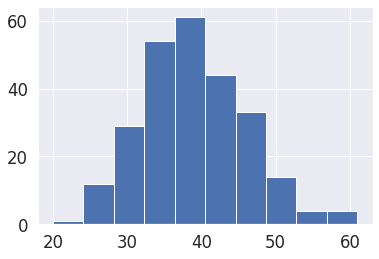

In [289]:
pyplot.hist(occr)
pyplot.show()


In [0]:
lsl = []
 
usl = []
normal_data = []
for i in occr:
  if i<30:
    lsl.append(i)
  elif i>45 :
    usl.append(i)
  else:
    normal_data.append(i)

Abnormal_data = lsl + usl   

In [0]:
bw = []
j = 1
while j < 500:
  bw.append(int(fake.random_int(min=1, max =500, step=3)))
  j+=1
#bw



In [0]:
from faker import Faker

fake = Faker("en_US")

with open('Train_data.csv' , 'w', newline ='') as f:
  thewriter = csv.writer(f)
  thewriter.writerow(['Type','Reqs_per_Secs','BW_in_Mbps'])
  for i, b in zip(occr,bw):
    if (i<30 and b<5):
      thewriter.writerow(['Abnormal',i,b])
    elif (i>30 and b>100):
      thewriter.writerow(['Abnormal',i,b])
    elif (45>i>30 and  100 > b > 5):
      thewriter.writerow(['Normal',i,b])
    else:
      pass
      
    


In [421]:
df = pandas.read_csv('Train_data.csv')
df


,Type,Reqs_per_Secs,BW_in_Mbps
0,Abnormal,41,292
1,Abnormal,49,109
2,Normal,40,70
3,Abnormal,51,121
4,Abnormal,36,469
...,...,...,...
212,Abnormal,49,160
213,Abnormal,45,241
214,Abnormal,39,202
215,Abnormal,34,370


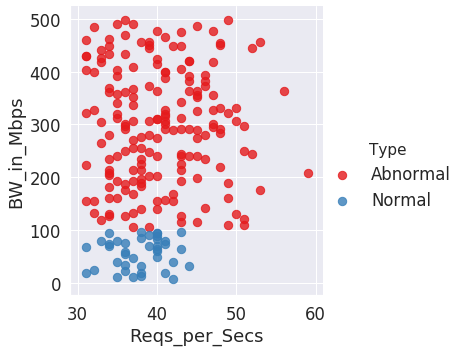

In [423]:

# Packages for analysis
import pandas as pd
import numpy as np
from sklearn import svm

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.5)

# Allows charts to appear in the notebook
%matplotlib inline


# Pickle package
import pickle
# Plot two ingredients
sns.lmplot('Reqs_per_Secs', 'BW_in_Mbps', data=df, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [424]:
# Specify inputs for the model
traffic = df[['Reqs_per_Secs','BW_in_Mbps']].values
type_label = np.where(df['Type']=='Normal', 0, 1)

# Feature names
df_features = df.columns.values[1:].tolist()
df_features

['Reqs_per_Secs', 'BW_in_Mbps']

In [425]:
# Fit the SVM model
model = svm.SVC(kernel='linear')
model.fit(traffic, type_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

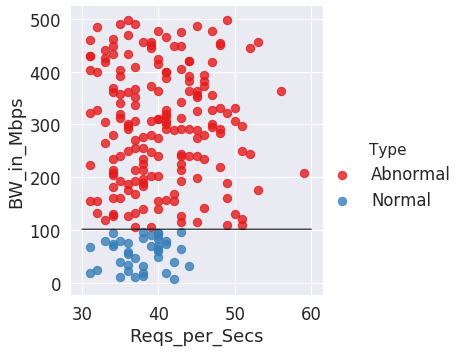

In [428]:

# Plot the hyperplane
sns.lmplot('Reqs_per_Secs', 'BW_in_Mbps', data=df, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=1, color='black');

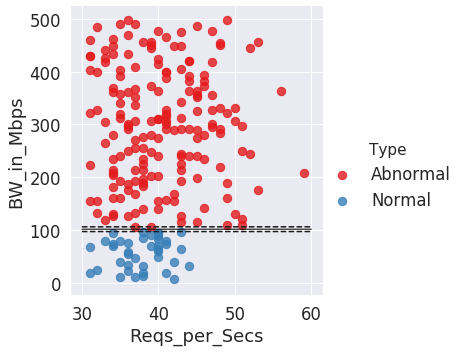

In [429]:

# Look at the margins and support vectors
sns.lmplot('Reqs_per_Secs', 'BW_in_Mbps', data=df, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=1, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='none');

In [0]:

# Create a function to guess when a recipe is a muffin or a cupcake
def Normal_or_abnormal(Reqs_per_Secs, BW_in_Mbps):
    if(model.predict([[Reqs_per_Secs, BW_in_Mbps]]))==0:
        print('This is normal data')
    else:
        print('This is a abnormal data!')

In [438]:
Normal_or_abnormal(100, 250)

This is a abnormal data!
